In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha


In [83]:
# First task
#   Implement the GD algorithm with the following parameters:
def GD(f, grad_f, x0, tolf, tolx, kmax):
    # As output, we want:
    # x -> The stationary point
    # f_val -> A vector containing the values of f during the iterations
    # err_val -> A vector containing the values of ||grad_f(x_k)||

    f_val = [f(x0)]
    err_val = [grad_f(x0)]
    alpha = backtracking(f, grad_f, x0)
    
    # Init iteration
    k = 0
    x = [x0]
    
    rel_tol_cond = True
    rel_inp_cond = True
    max_it_cond = True
    
    while rel_tol_cond and rel_inp_cond and max_it_cond:
        x.append(x[k] - alpha * grad_f(x[k]))
        f_val.append(f(x[k+1]))
        err_val.append(grad_f(x[k]))
        
        # Update alpha and k
        alpha = backtracking(f, grad_f, x[k+1])
        k += 1
        
        rel_tol_cond = np.linalg.norm(grad_f(x[k-1])) > tolf * np.linalg.norm(grad_f(x0))
        # We skip the first iteration
        rel_inp_cond = True if k == 0 else np.linalg.norm(x[k] - x[k-1]) > tolx
        max_it_cond = k < kmax

    return x[k], f_val, err_val

In [84]:
def f(x):
    return x**2 + 2*x + 1

In [85]:
def grad_f(x):
    return 2*x + 2

In [86]:
x, f_val, err_val = GD(f, grad_f, 10, 0.001, 0.001, 100)
x

-0.9907141963681942

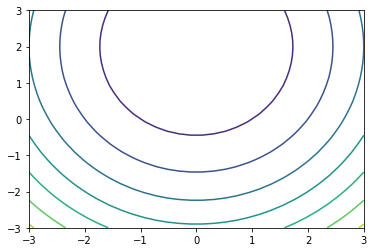

In [87]:
# Contourn plot of function f: R^2 -> R
def f(x1, x2):
    return 2*x1**2 + (x2 - 2)**2

xv = np.linspace(-3, 3, 30)
yv = np.linspace(-3, 3, 30)
xx, yy = np.meshgrid(xv, yv)

# The element in position xx[i, j] is the x coordinate of the intersection
# i, j into the grid

# Compute the value of f over the grid
zz = f(xx, yy)

# Contour plot
plt.contour(xx, yy, zz)
plt.show()

In [88]:
# Assume we have a vector of iterations
x = np.array([[-2, 1], [0, 1], [0, 2]])
x.shape

(3, 2)

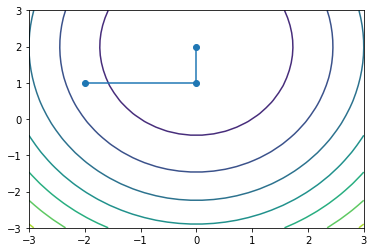

In [89]:
plt.contour(xx, yy, zz)
plt.plot(x[:, 0], x[:, 1], "o-")
plt.show()

In [ ]:
# SGD TODO
def l(w, D):
    # Loss function over d
    return

def grad_l(w, D):
    # 
    return

def SGD(l, grad_l, w0, D, batch_size, n_epochs):
    # In VGD, w0 should be chosen randomly (from Gausian)
    # Upgrade: return f_val (over M)
    # D = (X, Y) where X is d x N
    #                  Y is N
    # Return x
    
    X, Y = D
    d, N = X.shape
    
    
    for epoch in range(n_epochs):
        print(f"--> Epoch {epoch}")
        # Shuffle the dataset
        rng = np.random.default_rng()
        rng.shuffle(X, axis=1)
        rng.shuffle(Y)
        for batch in range(N / batch_size):
            print(f"Batch {batch}")
            Mx = X[:, batch*batch_size:(batch+1)*batch_size]
            My = Y[batch*batch_size:(batch+1)*batch_size]
            
            M = (Mx, My)
            
            pass
    
    return

In [ ]:
# Logistic regression
